# New York City Taxi Fare Prediction

We are predicting the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations. While you can get a basic estimate based on just the distance between the two points, this will result in an RMSE of $5-$8, depending on the model used (see the starter code for an example of this approach in Kernels).

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/nehal/Downloads/train.csv", nrows=100000, parse_dates=["pickup_datetime"])

# Initial data exploration and developing insights with data visualization

In [3]:
df.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2                2  
3                1  
4                1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                100000 non-null  object             
 1   fare_amount        100000 non-null  float64            
 2   pickup_datetime    100000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   100000 non-null  float64            
 4   pickup_latitude    100000 non-null  float64            
 5   dropoff_longitude  100000 non-null  float64            
 6   dropoff_latitude   100000 non-null  float64            
 7   passenger_count    100000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 6.1+ MB


In [5]:
df.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  100000.000000     100000.000000    100000.000000      100000.000000   
mean       11.354652        -72.494682        39.914481         -72.490967   
std         9.716777         10.693934         6.225686          10.471386   
min       -44.900000       -736.550000       -74.007670         -84.654241   
25%         6.000000        -73.992041        40.734996         -73.991215   
50%         8.500000        -73.981789        40.752765         -73.980000   
75%        12.500000        -73.966982        40.767258         -73.963433   
max       200.000000         40.787575       401.083332          40.851027   

       dropoff_latitude  passenger_count  
count     100000.000000    100000.000000  
mean          39.919053         1.673820  
std            6.213427         1.300171  
min          -74.006377         0.000000  
25%           40.734182         1.000000  
50%           40.753243         1.000000  
75%           40.768166         2.000000  
max          404.616667         6.000000

In [6]:
df.drop('key', axis=1, inplace=True)

In [7]:
df.isnull().sum()  #Idnetification of null values.

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
df.dropna(inplace=True)  #dropping the null values, if any

In [9]:
df.shape         #There are 100000 rows and 7 columns  

(100000, 7)

In [10]:
df.value_counts()

fare_amount  pickup_datetime            pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count
-44.9        2010-02-19 23:47:10+00:00  -73.871120        40.773902        -73.676533         40.786890         1                  1
 10.9        2010-01-24 16:55:17+00:00  -73.994498        40.761023        -73.998050         40.686850         1                  1
             2010-02-17 11:54:00+00:00  -73.973813        40.756023        -73.985850         40.760315         2                  1
             2010-02-16 20:06:00+00:00  -73.978180        40.763188        -74.000310         40.730162         5                  1
             2010-02-14 22:17:00+00:00  -74.007005        40.715960        -73.988208         40.760025         1                  1
                                                                                                                                  ..
 6.5         2015-05-30 03:12:49+00:00  -73.985756        40.731750       

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

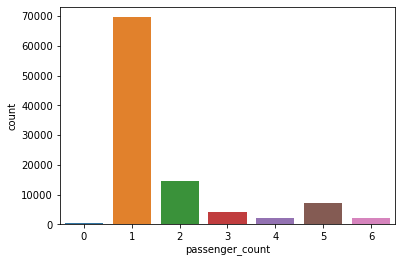

In [11]:
import seaborn as sns
sns.countplot(x='passenger_count',data=df)      #Graph representing count of passengers.

In [12]:
 #feature engineering

In [13]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime, format='%Y-%m-%d %H:%M:%S')    #converting pickup_datetime to datetime format

In [14]:
df['year'] = df['pickup_datetime'].dt.year  
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['minute'] = df['pickup_datetime'].dt.minute

In [15]:
df = df.drop(columns=['pickup_datetime'])                                        

In [16]:
df.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.844311        40.721319         -73.841610   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  year  month  day  hour  minute  
0         40.712278                1  2009      6   15    17      26  
1         40.782004                1  2010      1    5    16      52  
2         40.750562                2  2011      8   18     0      35  
3         40.758092                1  2012      4   21     4      30  
4         40.783762                1  2010      3    9     7      51

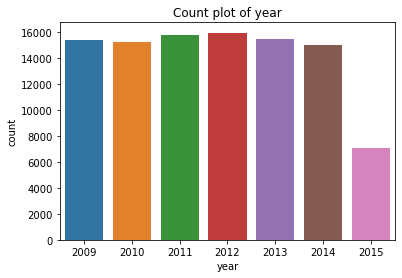

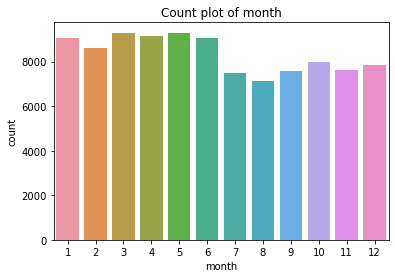

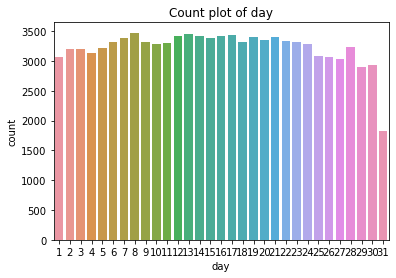

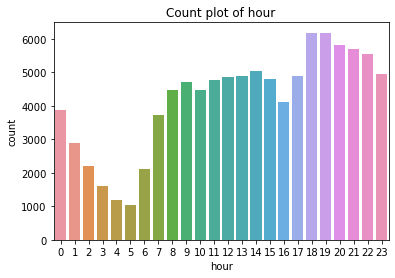

In [17]:
import matplotlib.pyplot as plt
variables = ['year', 'month', 'day', 'hour']

for var in variables:
    plt.figure()
    sns.countplot(x=var, data=df).set(title=f'Count plot of {var}')

In [18]:
sum(df['fare_amount']>100)

40

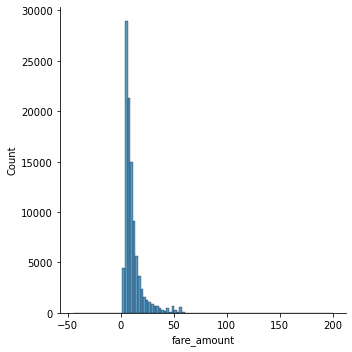

In [19]:
sns.displot(df['fare_amount'], kde=False, bins=100) #shows the distribution of fare_amount of taxi

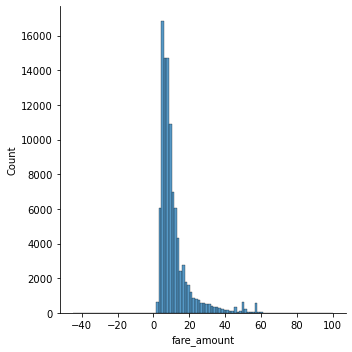

In [20]:
sns.displot(df[df['fare_amount']<=100]['fare_amount'], kde=False, bins=100)

In [21]:
sum(df['passenger_count']==0)

366

Text(0, 0.5, 'Fare Amount')

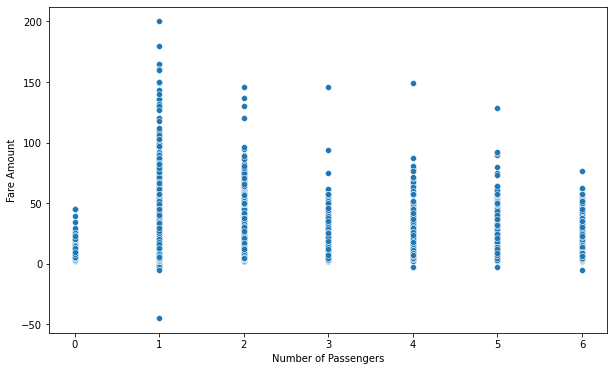

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['passenger_count'], y=df['fare_amount'])   #To show relation between fare_amount and number of passenger
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')

<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

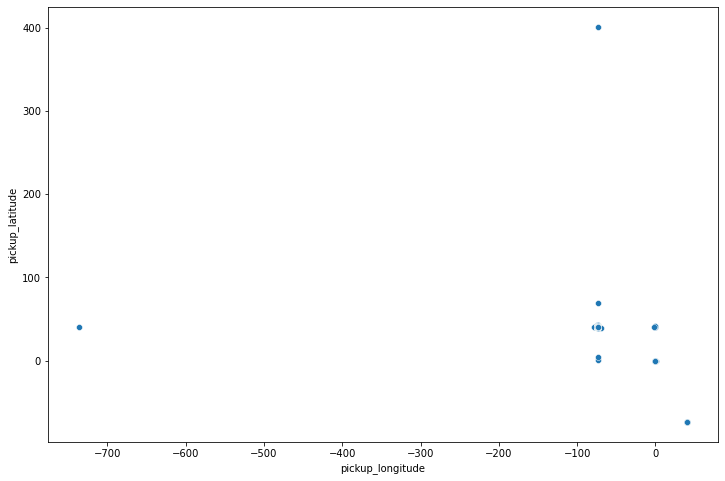

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['pickup_longitude'], y=df['pickup_latitude'])      #To show relationship between pick-up_longitude and pickup_latitude

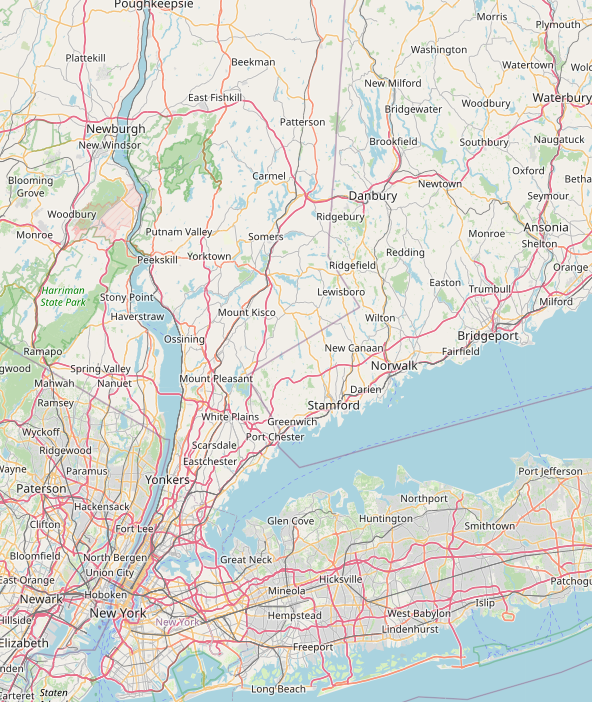

In [24]:
import PIL
import urllib
import io

url = 'https://i.imgur.com/xx2b9dC.png'
nyc_map = PIL.Image.open(urllib.request.urlopen(url))
nyc_map

In [25]:
nyc_map = np.array(nyc_map)

In [26]:
bbox = (min(df.pickup_longitude.min(), df.dropoff_longitude.min()),
        max(df.pickup_longitude.max(), df.dropoff_longitude.max()),
        min(df.pickup_latitude.min(), df.dropoff_latitude.min()),
        max(df.pickup_latitude.max(), df.dropoff_latitude.max())
)
       
bbox

(-736.55, 40.851027, -74.00767, 404.616667)

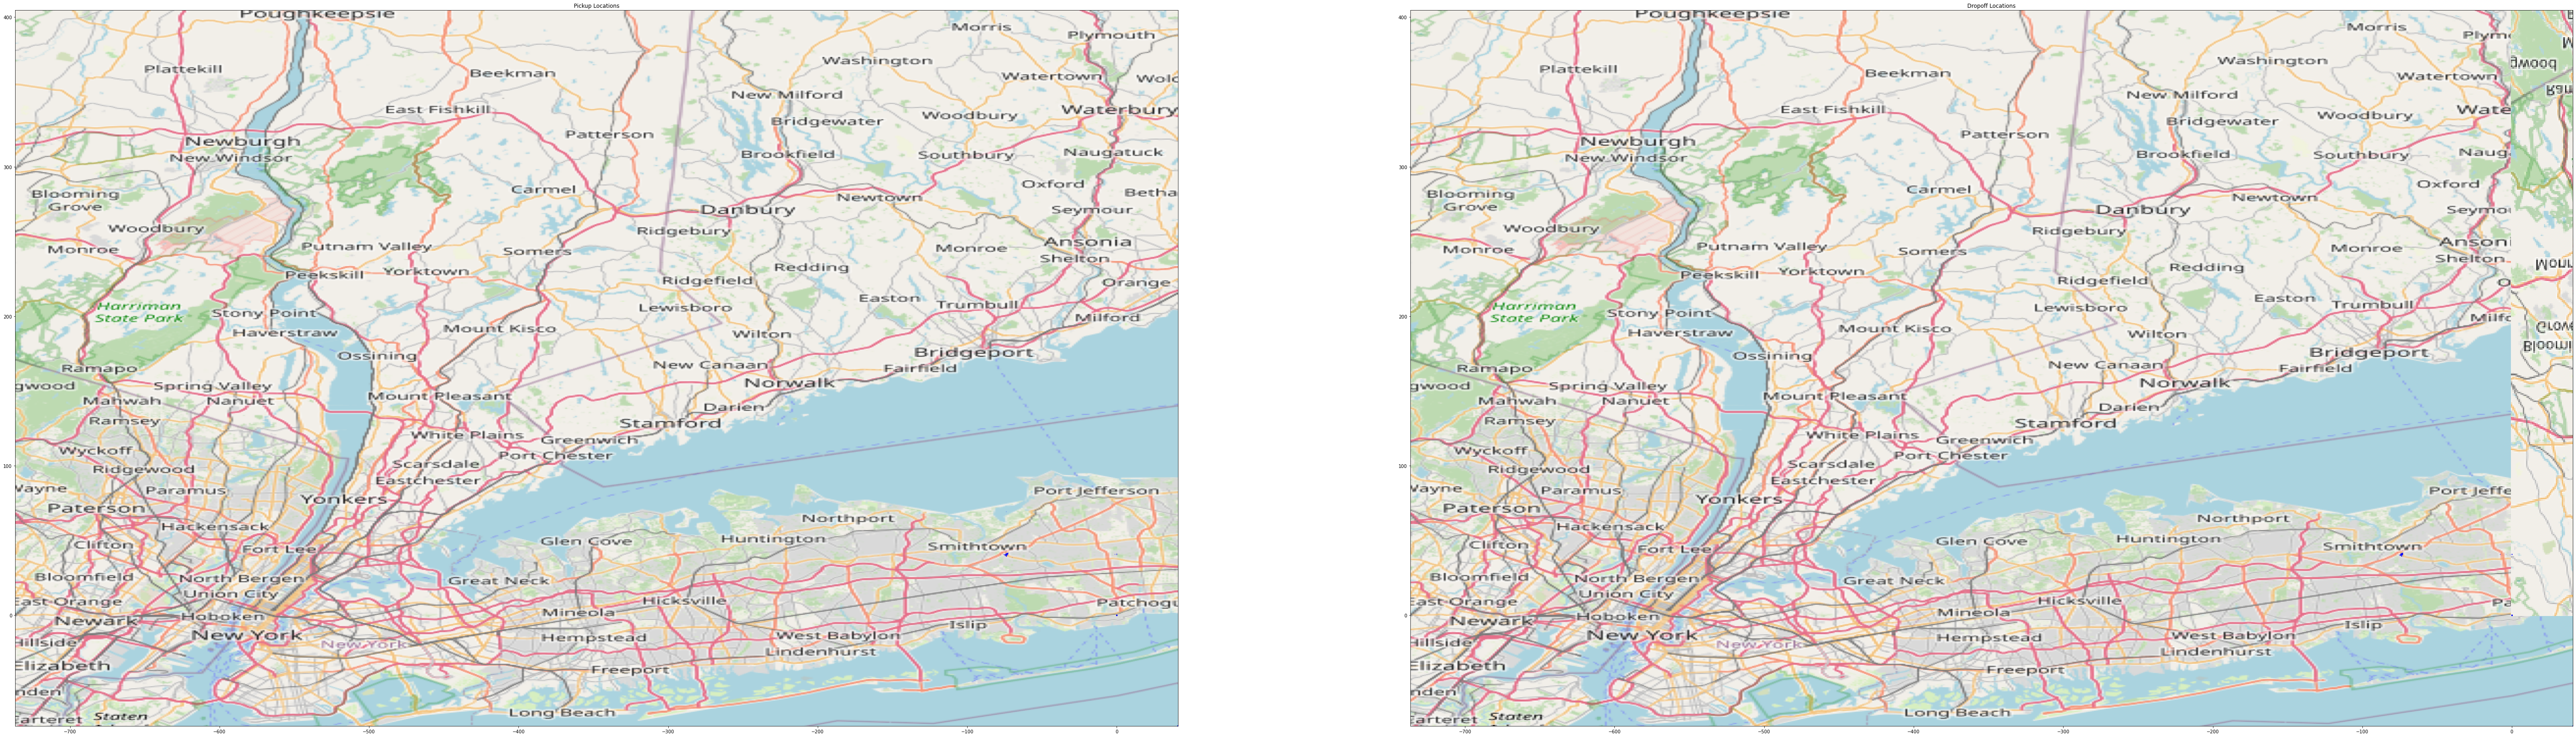

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (100,100))
ax[0].scatter(df['pickup_longitude'], df['pickup_latitude'], zorder=1, alpha= 0.2, c='b', s=1)
ax[0].set_title('Pickup Locations')
ax[0].set_xlim(bbox[0],bbox[1])
ax[0].set_ylim(bbox[2],bbox[3])
ax[0].imshow(nyc_map, zorder=0, extent = bbox, aspect= 'equal')

ax[1].scatter(df['dropoff_longitude'], df['dropoff_latitude'], zorder=1, alpha= 0.2, c='b', s=1)
ax[1].set_title('Dropoff Locations')
ax[1].set_xlim(bbox[0],bbox[1])
ax[1].set_ylim(bbox[2],bbox[3])
ax[1].imshow(nyc_map, zorder=0, extent = bbox, aspect= 'equal')

plt.imshow(nyc_map)

# Feature engineering--creating new features

In [28]:
def manhattan_dist(lat_p, long_p, lat_d, long_d):  
    distance = np.abs(lat_d - lat_p) + np.abs(long_d - long_p)
    
    return distance

In [29]:
def add_airport_info(train):
#     nyc = (40.7141667, -74.0063889)
#     jfk = (-73.7822222222, 40.6441666667)
#     ewr = (-74.175, 40.69)
#     lgr = (-73.87, 40.77)
    
    nyc = (-74.0063889, 40.7141667)
    jfk = (40.6441666667, -73.7822222222)
    ewr = (40.69, -74.175)
    lgr = (40.77, -73.87)
    
    df['distance_to_center'] = manhattan_dist(nyc[0], nyc[1], df['pickup_latitude'], df['pickup_longitude'])
    df['pickup_distance_to_jfk'] = manhattan_dist(jfk[0], jfk[1], df['pickup_latitude'], df['pickup_longitude'])
    df['dropoff_distance_to_jfk'] = manhattan_dist(jfk[0], jfk[1], df['dropoff_latitude'], df['dropoff_longitude'])
    df['pickup_distance_to_ewr'] = manhattan_dist(ewr[0], ewr[1], df['pickup_latitude'], df['pickup_longitude'])
    df['dropoff_distance_to_ewr'] = manhattan_dist(ewr[0], ewr[1],df['dropoff_latitude'], df['dropoff_longitude'])
    df['pickup_distance_to_lgr'] = manhattan_dist(lgr[0], lgr[1], df['pickup_latitude'], df['pickup_longitude'])
    df['dropoff_distance_to_lgr'] = manhattan_dist(lgr[0], lgr[1], df['dropoff_latitude'], df['dropoff_longitude'])

    df['long_diff'] = df.dropoff_longitude - df.pickup_longitude
    df['lat_diff'] = df.dropoff_latitude - df.pickup_latitude

In [30]:
df.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.844311        40.721319         -73.841610   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  year  month  day  hour  minute  
0         40.712278                1  2009      6   15    17      26  
1         40.782004                1  2010      1    5    16      52  
2         40.750562                2  2011      8   18     0      35  
3         40.758092                1  2012      4   21     4      30  
4         40.783762                1  2010      3    9     7      51

# Discover if data possess any structure

In [31]:
num_data = df.select_dtypes(include = ['float64', 'int64']).copy()
num_data.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'hour', 'minute'],
      dtype='object')

In [32]:
num_data.head(5)

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.844311        40.721319         -73.841610   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  year  month  day  hour  minute  
0         40.712278                1  2009      6   15    17      26  
1         40.782004                1  2010      1    5    16      52  
2         40.750562                2  2011      8   18     0      35  
3         40.758092                1  2012      4   21     4      30  
4         40.783762                1  2010      3    9     7      51

In [33]:
num_data.shape

(100000, 11)

In [34]:
cols = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [35]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
nc = ss.fit_transform(num_data.loc[:,cols])

In [36]:
nc.shape

(100000, 6)

In [37]:
nc = pd.DataFrame(nc, columns = cols)
nc.head(5)

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0    -0.705449         -0.126206         0.129599          -0.128985   
1     0.570701         -0.142265         0.127990          -0.142131   
2    -0.581950         -0.139150         0.136016          -0.143275   
3    -0.376120         -0.139561         0.131498          -0.143306   
4    -0.623116         -0.137781         0.137098          -0.139971   

   dropoff_latitude  passenger_count  
0          0.127664        -0.518258  
1          0.138886        -0.518258  
2          0.133825         0.250876  
3          0.135037        -0.518258  
4          0.139169        -0.518258

In [38]:
# Adding few columns that are discrete
# These columns were not to be scaled

nc['fare_amount'] = df['fare_amount']
nc['pickup_longitude'] = df['pickup_longitude']
nc['pickup_latitude'] = df['pickup_latitude']
nc['dropoff_longitude'] = df['dropoff_longitude']
nc['dropoff_latitude'] = df['dropoff_latitude']

In [39]:
# Creating a dataframe from random data for comparison:

rng = np.random.default_rng()
nc_rand = pd.DataFrame(rng.normal(size = (100000, 6)),
                       columns = cols )   

In [40]:
nc_rand['fare_amount'] = np.random.randint(2,   size= (100000,))   # [0,1]
nc_rand['pickup_longitude']        = np.random.randint(2,   size= (100000,))   # [0,1]
nc_rand['pickup_latitude']       = np.random.randint(1,4, size= (100000,))   # [1,2,3]
nc_rand['dropoff_longitude']     = np.random.randint(24,  size= (100000,))   # [0 to 23]
nc_rand['dropoff_latitude']       = np.random.randint(7,   size= (100000,))   # [0 to 6]
nc_rand['passenger_count']       = np.random.randint(7,   size= (100000,))   # [0 to 6]


nc_rand.shape

(100000, 6)

<b> Parallel coordinates plot

Text(0.5, 1.0, 'Parallel chart with ad data')

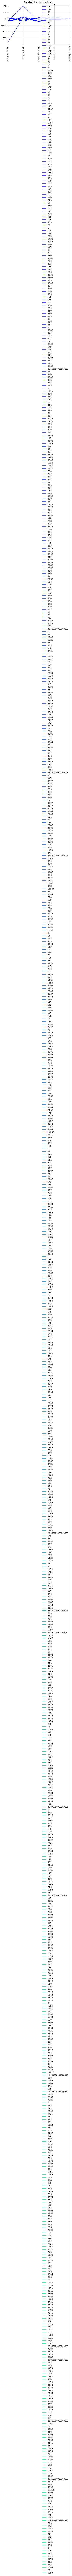

In [43]:
# Parallel coordinates with original data
fig2 = plt.figure()
ax = pd.plotting.parallel_coordinates(nc,
                                 'fare_amount',
                                  colormap= plt.cm.winter
                                  )

plt.xticks(rotation=90)
plt.title("Parallel chart with ad data")

Text(0.5, 1.0, 'Parallel chart with random data')

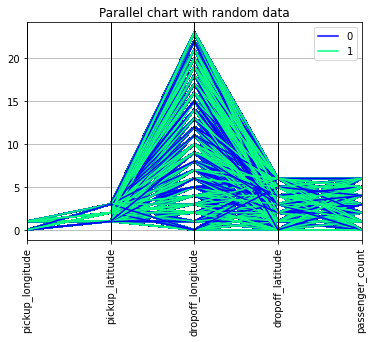

In [44]:
# Parallel coordinates with random data

fig1 = plt.figure()
pd.plotting.parallel_coordinates(nc_rand,
                                 'fare_amount',    # class_column
                                  colormap='winter'
                                  )
plt.xticks(rotation=90)
plt.title("Parallel chart with random data")

<b>Andrews plot

Text(0.5, 1.0, 'Andrews curve with ad data')

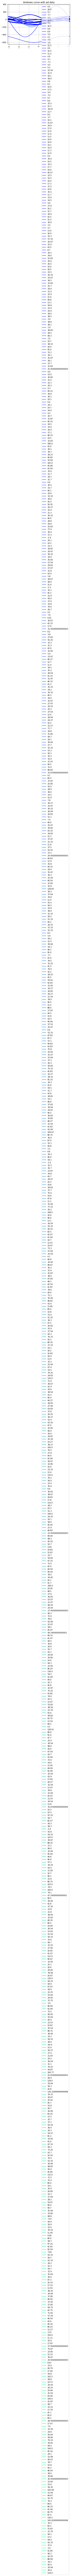

In [45]:
# Andrews plots with original data
fig4 = plt.figure()
pd.plotting.andrews_curves(nc,
                           'fare_amount',
                            colormap = plt.cm.winter
                           )
plt.xticks(rotation=90)
plt.title("Andrews curve with ad data")

Text(0.5, 1.0, 'Andrews plots with random data')

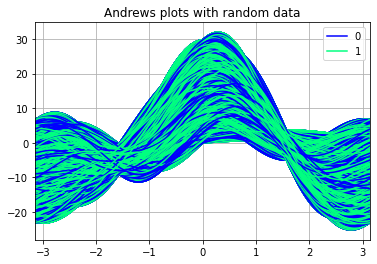

In [48]:
# Andrews charts with random data
fig3 = plt.figure()
pd.plotting.andrews_curves(nc_rand,
                           'fare_amount',
                           colormap = 'winter')

plt.title("Andrews plots with random data")

<b> Radviz plot

<AxesSubplot:>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


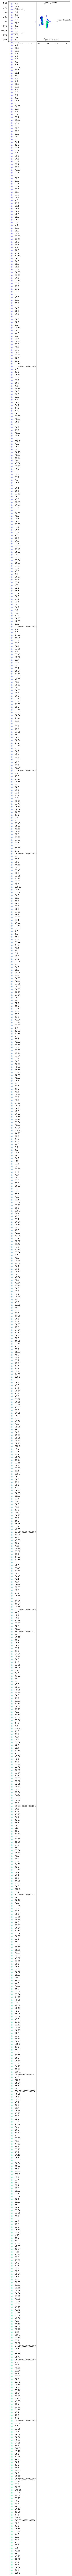

In [46]:
# Radviz plot with original data

fig5 = plt.figure()
pd.plotting.radviz(nc,
                   class_column ='fare_amount',
                   colormap= plt.cm.winter,
                   alpha = 0.4
                   )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:170: RuntimeWarning: invalid value encountered in true_divide
  y = (s * row_).sum(axis=0) / row.sum()


<AxesSubplot:>

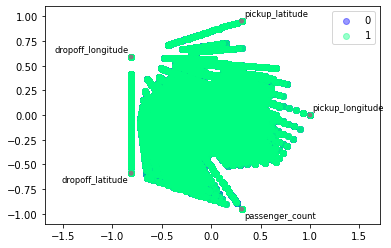

In [47]:
# Radviz plot with random data

fig5 = plt.figure()
pd.plotting.radviz(nc_rand,
                   class_column ='fare_amount',
                   colormap= plt.cm.winter,
                   alpha = 0.4
                   )

# Data pipelining for data processing and modeling

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [42]:
df.head(5)

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.844311        40.721319         -73.841610   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  year  month  day  hour  minute  
0         40.712278                1  2009      6   15    17      26  
1         40.782004                1  2010      1    5    16      52  
2         40.750562                2  2011      8   18     0      35  
3         40.758092                1  2012      4   21     4      30  
4         40.783762                1  2010      3    9     7      51

In [43]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'hour', 'minute'],
      dtype='object')

In [44]:
df.drop(columns=['year', 'month', 'day', 'hour', 'minute'], inplace=True)

In [45]:
df.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.844311        40.721319         -73.841610   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  
0         40.712278                1  
1         40.782004                1  
2         40.750562                2  
3         40.758092                1  
4         40.783762                1

In [46]:
df=df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'fare_amount']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_longitude   100000 non-null  float64
 1   pickup_latitude    100000 non-null  float64
 2   dropoff_longitude  100000 non-null  float64
 3   dropoff_latitude   100000 non-null  float64
 4   passenger_count    100000 non-null  int64  
 5   fare_amount        100000 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 4.6 MB


In [49]:
df['fare_amount'] = np.where((df['fare_amount'] >= df['fare_amount'].mean()), 1, 0)
df.head(5)

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  fare_amount  
0                1            0  
1                1            1  
2                2            0  
3                1            0  
4                1            0

In [50]:
# Lable encoding data
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)

In [51]:
# Divide data into predictors and target
# First 5 columns are predictors

X = df.iloc[ :, 0:5]
X.head(2)

# 5th index or 6th column is target
print("\n\nTarget,y, values")
y = df.iloc[ : , 5]
y.head()



Target,y, values


0    0
1    1
2    0
3    0
4    0
Name: fare_amount, dtype: int64

In [52]:
# Split dataset into train and validation parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    shuffle = True
                                                    )      

In [53]:
X_train.shape

(80000, 5)

In [54]:
X_test.shape

(20000, 5)

In [55]:
y_train.shape

(80000,)

In [56]:
y_test.shape

(20000,)

In [57]:
# Storing column names somewhere for use in feature importance
colnames = X.columns.tolist()

<b> Creating a Pipeline

In [58]:

# Pipeline steps
# steps: List of (name, transform) tuples
#       (implementing fit/transform) that are
#       chained, in the order in which they
#       are chained, with the last object an
#       estimator.
#      Format: [(name, transformer), (name, transformer)..(name, estimator)]
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler as ss
steps_xg = [('sts', ss()),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)        # Specify other parameters here
            )
            ]

# Instantiate Pipeline object

pipe_xg = Pipeline(steps_xg)

## Cross-Validation

<b> Grid Search code to discover best pipeline parameters

In [59]:
##################### DD. Grid Search #################

# Specify xgboost parameter-range
# Dictionary of parameters (16 combinations)
# Syntax: {
#          'transformerName__parameterName' : [ <listOfValues> ]
#              }
#
# What parameters in the pipe are available for tuning

print("\n\n--Which parameters can be tuned?--\n\n")
pipe_xg.get_params()



--Which parameters can be tuned?--




{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, gamma=None,
                 gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                 max_leaves=None, min_child_weight=None, missing=nan,
                 monotone_constraints=None, n_estimators=100, n_jobs=3,
                 num_parallel_tree=None, predictor=None, random_state=None,
                 reg_alpha=None, reg_lambda=None, ...))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBClassifier(base_score=None, booster=None, callbacks=None,
               c

Now that we know which parameters can be tuned, specify parameter space

In [60]:
#  Define dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
              'xg__n_estimators':   [200,  300],  # Number of boosted trees to fit
                                                  # l1 and l2 specifications will change
                                                  # the values of coeff of boosted trees
                                                  # but not their numbers

              'xg__max_depth':      [4,6],
              'pca__n_components' : [4,5],
              'xg__booster': ['gbtree','gblinear']
              }                               # Total: 2 * 2 * 2 * 2

In [61]:
#  Define revised dictionary
#       This takes 3.5 minutes
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
               'xg__max_depth':      [4,6],
 
              'pca__n_components' : [4,5],
               }                               # Total: 2 * 2 * 2 * 2

## Hyperparameter tuning both using Grid Search and Randomized Search

In [62]:
# Grid Search (16 * 2) iterations
#    Create Grid Search object first with all necessary
#    specifications. Note that data, X, as yet is not specified
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#    Data Leakage and pipelining:
#    Pipeline avoids data leakage during GridSearch
#    See this: https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )

In [63]:
## Delete objects not needed
#      We need X_train, y_train, X_test, y_test
import gc
del X
del df
del y
gc.collect()

927

# Model fitting

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [65]:
#Start fitting pipeline to data
import time
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60               



--Takes time...---

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[06:54:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.





0.29280978441238403

<b>Performance Scores


In [72]:
# 1.9 Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from xgboost import plot_importance
from sklearn.inspection import permutation_importance

In [66]:
f"Best score: {clf.best_score_} " 

'Best score: 0.92668211377141 '

In [67]:
f"Best parameter set {clf.best_params_}"

"Best parameter set {'pca__n_components': 5, 'xg__learning_rate': 0.05, 'xg__max_depth': 6}"

In [68]:
# Make predictions using the best returned model
y_pred = clf.predict(X_test)
print("--Few predictions--\n")
y_pred[:4]

--Few predictions--



array([1, 0, 0, 0])

In [69]:
# Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0 



--Accuracy Score--



87.98

In [70]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)



--Confusion Matrix--



array([[13181,   718],
       [ 1686,  4415]])

In [73]:
print("\n\n--F1 Score pos-label: 0--\n")
f1_score(y_test,y_pred, pos_label = 0)  



--F1 Score pos-label: 0--



0.9164291177084057



--ROC curve--



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


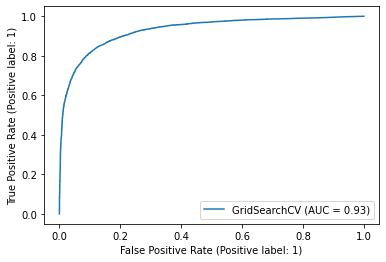

In [74]:
#ROC curve and get AUC

print("\n\n--ROC curve--\n")
_=plot_roc_curve(clf, X_test, y_test)

<B>Feature importance


In [76]:
# Get feature importances from GridSearchCV best fitted 'xg' model

print("\n\n--How many features--\n")
clf.best_estimator_.named_steps["xg"].feature_importances_.shape



--How many features--



(5,)

In [77]:
print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_



---Feature importances---



array([0.08628857, 0.01628871, 0.14815003, 0.49856082, 0.25071192],
      dtype=float32)

In [78]:
# Create a dataframe of feature importances
# with names of columns and sorted by feature-imp

imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

df_imp = pd.DataFrame(
                      data = imp_values,
                      index = colnames,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')

df_imp


imp
pickup_latitude    0.016289
pickup_longitude   0.086289
dropoff_longitude  0.148150
passenger_count    0.250712
dropoff_latitude   0.498561

In [79]:
# First five columns with least feature importance are:

list(df_imp.index.values[:5])

['pickup_latitude',
 'pickup_longitude',
 'dropoff_longitude',
 'passenger_count',
 'dropoff_latitude']

<B>Random Search code to discover best pipeline parameters


In [85]:
# Randomized Search

# Tune parameters using randomized search
# Hyperparameters to tune and their ranges
parameters = {'xg__learning_rate':  (0, 1),
              'xg__n_estimators':   range(50,300),
              'xg__max_depth':      range(3,10),
              'pca__n_components' : range(4,5)}

<B>Instantiate RandomSearchCV class


In [86]:
# Tune parameters using random search
# Create the object first

rs = RandomizedSearchCV(
                          pipe_xg,
                          param_distributions=parameters,
                          scoring= ['roc_auc', 'accuracy'],
                          n_iter=4,           # Max combination of
                                              # parameter to try. Default = 10
                          verbose = 1,
                          refit = 'roc_auc',
                          n_jobs = 2,          # Use parallel cpu threads
                          cv = 2               # No of folds.
                                              # So n_iter * cv combinations
                        )

<b>Start training RandomSearchCV object


In [87]:
# Run random search for 25 iterations. 

start = time.time()
rs.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60   

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[07:05:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.





0.17478448152542114

<b>Performance scores


In [88]:
# Evaluate
f"Best score: {rs.best_score_} "

'Best score: 0.5 '

In [89]:
f"Best parameter set: {rs.best_params_} "

"Best parameter set: {'xg__n_estimators': 125, 'xg__max_depth': 5, 'xg__learning_rate': 0, 'pca__n_components': 4} "

In [90]:
# Make predictions from the best returned model
y_pred = rs.predict(X_test)

In [91]:
# Accuracy 
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy * 100.0}" 

'Accuracy: 69.49499999999999'

***

***

 <I><U>                                   This Notebook Ends Here